In [1]:
import pandas as pd

# Load the dataset (update the path if needed)
train_file_path = r"D:\Capstone projects\Microsoft SCO\new_train_sample.csv"

# Load the dataset
df = pd.read_csv(train_file_path)

# Display basic information about the dataset
print("Dataset Info:")
df.info()

print("\nFirst 5 Rows:")
print(df.head())

print("\nDataset Shape:")
print(df.shape)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   Id                  int64  
 2   OrgId               int64  
 3   IncidentId          int64  
 4   AlertId             int64  
 5   Timestamp           object 
 6   DetectorId          int64  
 7   AlertTitle          int64  
 8   Category            object 
 9   MitreTechniques     object 
 10  IncidentGrade       object 
 11  ActionGrouped       object 
 12  ActionGranular      object 
 13  EntityType          object 
 14  EvidenceRole        object 
 15  DeviceId            int64  
 16  Sha256              int64  
 17  IpAddress           int64  
 18  Url                 int64  
 19  AccountSid          int64  
 20  AccountUpn          int64  
 21  AccountObjectId     int64  
 22  AccountName         int64  
 23  DeviceName          int64  
 24  NetworkMes

In [2]:
# Dropping irrelevant columns
columns_to_drop = [
    'Unnamed: 0', 'Id', 'IncidentId', 'AlertId', 'OrgId', 'DeviceId', 
    'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId', 
    'AccountName', 'DeviceName', 'NetworkMessageId'
]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Handling missing values - Drop columns with more than 50% missing values
threshold = 0.5 * len(df)
df = df.dropna(thresh=threshold, axis=1)

# Convert 'Timestamp' to datetime and extract date-related features
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    df['hour'] = df['Timestamp'].dt.hour
    df['day_of_week'] = df['Timestamp'].dt.dayofweek
    df['month'] = df['Timestamp'].dt.month
    df = df.drop(columns=['Timestamp'])

# Encoding categorical features with label encoding
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Check the processed data
print("Data Info After Preprocessing:")
df.info()

print("\nFirst 5 Rows After Preprocessing:")
print(df.head())


Data Info After Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 23 columns):
 #   Column              Dtype
---  ------              -----
 0   DetectorId          int64
 1   AlertTitle          int64
 2   Category            int64
 3   IncidentGrade       int64
 4   EntityType          int64
 5   EvidenceRole        int64
 6   RegistryKey         int64
 7   RegistryValueName   int64
 8   RegistryValueData   int64
 9   ApplicationId       int64
 10  ApplicationName     int64
 11  OAuthApplicationId  int64
 12  FileName            int64
 13  FolderPath          int64
 14  ResourceIdName      int64
 15  OSFamily            int64
 16  OSVersion           int64
 17  CountryCode         int64
 18  State               int64
 19  City                int64
 20  hour                int32
 21  day_of_week         int32
 22  month               int32
dtypes: int32(3), int64(20)
memory usage: 780.5 MB

First 5 Rows After Preprocess

In [3]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop(columns=['IncidentGrade'])
y = df['IncidentGrade']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the resulting datasets
print("Training Set Shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing Set Shape (X_test, y_test):", X_test.shape, y_test.shape)

# Check the class distribution in the training and testing sets
print("\nClass Distribution in Training Set:")
print(y_train.value_counts())

print("\nClass Distribution in Testing Set:")
print(y_test.value_counts())


Training Set Shape (X_train, y_train): (3806734, 22) (3806734,)
Testing Set Shape (X_test, y_test): (951684, 22) (951684,)

Class Distribution in Training Set:
IncidentGrade
0    1643819
2    1329669
1     812626
3      20620
Name: count, dtype: int64

Class Distribution in Testing Set:
IncidentGrade
0    410955
2    332418
1    203156
3      5155
Name: count, dtype: int64


In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
numerical_columns = X_train.select_dtypes(include=[np.number]).columns
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Check the first few rows of the scaled training data
print("First 5 Rows of Scaled Training Data:")
print(X_train.head())

# Verify the scaling by checking the mean and standard deviation
print("\nMean of Scaled Training Data (should be close to 0):")
print(X_train[numerical_columns].mean())

print("\nStandard Deviation of Scaled Training Data (should be close to 1):")
print(X_train[numerical_columns].std())


First 5 Rows of Scaled Training Data:
         DetectorId  AlertTitle  Category  EntityType  EvidenceRole  \
2091725   -0.254437   -0.257216  0.293729    1.394855     -1.099680   
3579682   -0.242939   -0.254249  1.865140    1.394855     -1.099680   
3434340   -0.238340   -0.256692  0.293729   -0.665117      0.909356   
2399537   -0.222243   -0.256169 -1.801485   -1.513340      0.909356   
2631676    0.120398   -0.245522  0.293729   -0.059242      0.909356   

         RegistryKey  RegistryValueName  RegistryValueData  ApplicationId  \
2091725     0.042339           0.020889           0.023385       0.150983   
3579682     0.042339           0.020889           0.023385       0.150983   
3434340     0.042339           0.020889           0.023385       0.150983   
2399537     0.042339           0.020889           0.023385       0.150983   
2631676     0.042339           0.020889           0.023385       0.150983   

         ApplicationName  ...  FolderPath  ResourceIdName  OSFamily  \
2

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Initialize the Logistic Regression model with class weight balancing
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print("Baseline Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Macro F1 Score: {macro_f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Baseline Model Performance:
Accuracy: 0.4137
Macro F1 Score: 0.3370
Precision: 0.3732
Recall: 0.5236


In [6]:
# //Analysis
# These results suggest that the model has room for improvement. The low accuracy and F1 score indicate that it’s not performing well in differentiating between the classes. This is expected for a baseline model.

In [7]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    random_state=42,
    eval_metric='mlogloss'
)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
macro_f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro')
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro')

# Print the evaluation metrics
print("XGBoost Model Performance:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Macro F1 Score: {macro_f1_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")

XGBoost Model Performance:
Accuracy: 0.7975
Macro F1 Score: 0.7513
Precision: 0.7948
Recall: 0.7297


In [8]:
# // Complex analysis where blocked The MemoryError during hyperparameter tuning is due to the large size of your dataset and the extensive computation required for cross-validation with RandomizedSearchCV.

In [9]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import xgboost as xgb
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.utils import resample

# Downsample the training data (20% of the original training set)
X_train_sample, y_train_sample = resample(X_train, y_train, replace=False, n_samples=int(0.2 * len(X_train)), random_state=42)

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'min_child_weight': [1, 3]
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')

# Set up HalvingRandomSearchCV
halving_search = HalvingRandomSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    factor=2,
    scoring='f1_macro',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the HalvingRandomSearchCV
halving_search.fit(X_train_sample, y_train_sample)

# Get the best model and parameters
best_model = halving_search.best_estimator_
best_params = halving_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the tuned model on the test data
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
macro_f1_best = f1_score(y_test, y_pred_best, average='macro')
precision_best = precision_score(y_test, y_pred_best, average='macro')
recall_best = recall_score(y_test, y_pred_best, average='macro')

# Print the evaluation metrics
print("\nTuned XGBoost Model Performance:")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Macro F1 Score: {macro_f1_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")


n_iterations: 8
n_required_iterations: 8
n_possible_iterations: 15
min_resources_: 24
max_resources_: 761346
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 192
n_resources: 24
Fitting 3 folds for each of 192 candidates, totalling 576 fits


C:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 192 is smaller than n_iter=31722. Running 192 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


----------
iter: 1
n_candidates: 96
n_resources: 48
Fitting 3 folds for each of 96 candidates, totalling 288 fits


C:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


----------
iter: 2
n_candidates: 48
n_resources: 96
Fitting 3 folds for each of 48 candidates, totalling 144 fits
----------
iter: 3
n_candidates: 24
n_resources: 192
Fitting 3 folds for each of 24 candidates, totalling 72 fits


C:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


----------
iter: 4
n_candidates: 12
n_resources: 384
Fitting 3 folds for each of 12 candidates, totalling 36 fits
----------
iter: 5
n_candidates: 6
n_resources: 768
Fitting 3 folds for each of 6 candidates, totalling 18 fits
----------
iter: 6
n_candidates: 3
n_resources: 1536
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 7
n_candidates: 2
n_resources: 3072
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}

Tuned XGBoost Model Performance:
Accuracy: 0.7418
Macro F1 Score: 0.6669
Precision: 0.7678
Recall: 0.6324


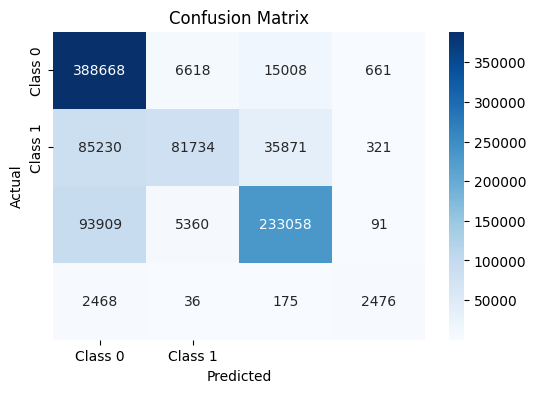

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

precision = precision_score(y_test, y_pred_best, average='macro')
recall = recall_score(y_test, y_pred_best, average='macro')
f1 = f1_score(y_test, y_pred_best, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.7678
Recall: 0.6324
F1 Score: 0.6669


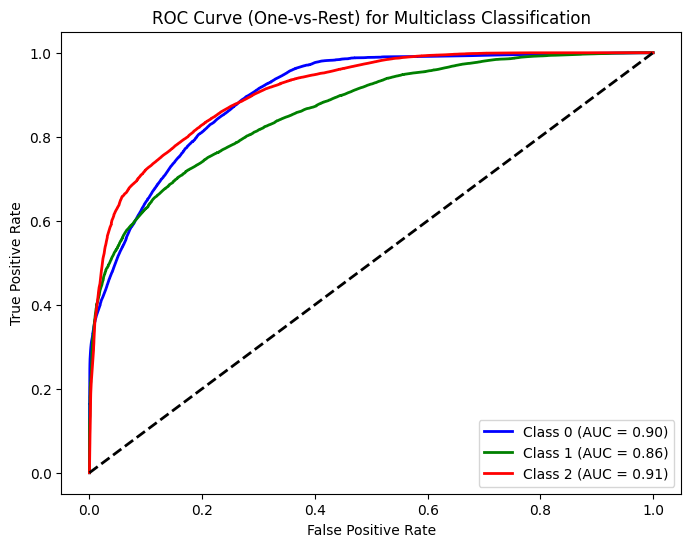

Class 0 AUC: 0.9008
Class 1 AUC: 0.8623
Class 2 AUC: 0.9097


In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output labels (this converts the labels to a one-vs-rest format)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust classes according to your problem
y_pred_proba = best_model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']  # Use appropriate colors for your classes

for i, color in zip(range(y_test_bin.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest) for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()

# Print AUC values for each class
for i in range(y_test_bin.shape[1]):
    print(f"Class {i} AUC: {roc_auc[i]:.4f}")


In [28]:
from sklearn.metrics import classification_report

# Define target names for each class
target_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

# Generate the classification report
print(classification_report(y_test, y_pred_best, target_names=target_names))


              precision    recall  f1-score   support

     Class 0       0.68      0.95      0.79    410955
     Class 1       0.87      0.40      0.55    203156
     Class 2       0.82      0.70      0.76    332418
     Class 3       0.70      0.48      0.57      5155

    accuracy                           0.74    951684
   macro avg       0.77      0.63      0.67    951684
weighted avg       0.77      0.74      0.73    951684

